In [1]:
%matplotlib inline 
import matplotlib as mpl 
import seaborn as sns 
import matplotlib.pyplot as plt 
import statsmodels.formula.api as smf 
import statsmodels.graphics.api as smg 
import pandas as pd 
import numpy as np 
import patsy 
from statsmodels.graphics.correlation import plot_corr 
from sklearn.model_selection import train_test_split 
plt.style.use('seaborn') 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                        count        mean  ...         75%       max
crimeRatePerCapita      506.0    3.613524  ...    3.677082   88.9762
landOver25K_sqft        506.0   11.363636  ...   12.500000  100.0000
non-retailLandProptn    506.0   11.136779  ...   18.100000   27.7400
riverDummy              506.0    0.069170  ...    0.000000    1.0000
nitrixOxide_pp10m       506.0    0.554695  ...    0.624000    0.8710
AvgNo.RoomsPerDwelling  506.0    6.284634  ...    6.623500    8.7800
ProptnOwnerOccupied     506.0   68.574901  ...   94.075000  100.0000
weightedDist            506.0    3.795043  ...    5.188425   12.1265
radialHighwaysAccess    506.0    9.549407  ...   24.000000   24.0000
propTaxRate_per10K      506.0  408.237154  ...  666.000000  711.0000
pupilTeacherRatio       506.0   18.455534  ...   20.200000   22.0000
pctLowerStatus          506.0   12.653063  ...   16.955000   37.9700
medianValue_Ks          506.0   22.532806  ...   25.000000   50.0000

[13 rows x 8 columns]


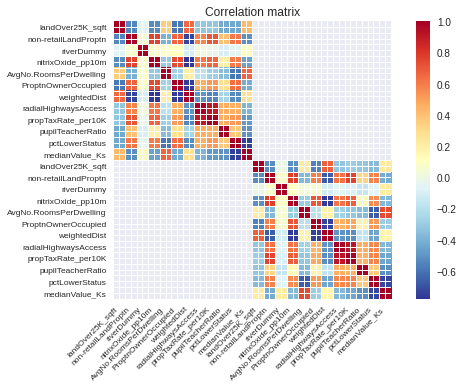

In [7]:
plt.style.use('seaborn')

boston = pd.read_csv('https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter02/Dataset/Boston.csv')
boston = boston.dropna()  #Drop out all missing values
boston = boston.drop_duplicates()  #Drops duplicate data

rename_boston = renamedBostonData = boston.rename(columns= 
{'CRIM':'crimeRatePerCapita',
 ' ZN ':'landOver25K_sqft',
 'INDUS ':'non-retailLandProptn',
 'CHAS':'riverDummy',
 'NOX':'nitrixOxide_pp10m',
 'RM':'AvgNo.RoomsPerDwelling',
 'AGE':'ProptnOwnerOccupied',
 'DIS':'weightedDist',
 'RAD':'radialHighwaysAccess',
 'TAX':'propTaxRate_per10K',
 'PTRATIO':'pupilTeacherRatio',
 'LSTAT':'pctLowerStatus',
 'MEDV':'medianValue_Ks'})

print(rename_boston.describe().T)    #show a description of the dataset (count, mean, max, etc..).Transpose it for better and easier viewing


X = rename_boston.drop('crimeRatePerCapita', axis=1)    # Let x be the dataset with 'CRPC' column dropped out. axis=1 means the column
y = rename_boston[['crimeRatePerCapita']]    # Let y be the 'CRPC' column (the labels)

X_train, y_train, X_test, y_test = train_test_split(X, y, train_size=0.7, random_state=10)    #Split the dataset into test and train, with a train_size of 0.7 and random_state an arbitary number so results are reproducible

train_data = pd.concat([X_train, y_train] , axis=1)     
test_data = pd.concat([X_test, y_test] , axis=1)

corrMatrix = train_data.corr(method='pearson')    #Correlation matrix, which shows how 2 variables are related to each other (How one changes when the other does)
x_axis = list(train_data.columns)      #makes a list of all the names of the columns in the train_data table. Use these as the x and y axis names as seen in the corr matrix
y_axis = list(train_data.columns)
plot = plot_corr(corrMatrix,xnames=x_axis,ynames=y_axis, title='Correlation matrix', normcolor=False, cmap='RdYlBu_r')

